In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris-dataset/Iris_dataset.csv


# *Reading data*

In [2]:
df  = pd.read_csv('/kaggle/input/iris-dataset/Iris_dataset.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
import matplotlib.pyplot as plt

# *Dataframes for different flowers*

In [4]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

# target = 0 -> flower is setosa
# target = 1 -> flower is versicolor
# target = 2 -> flower is virginica

# *Data visualization*

Text(0, 0.5, 'width')

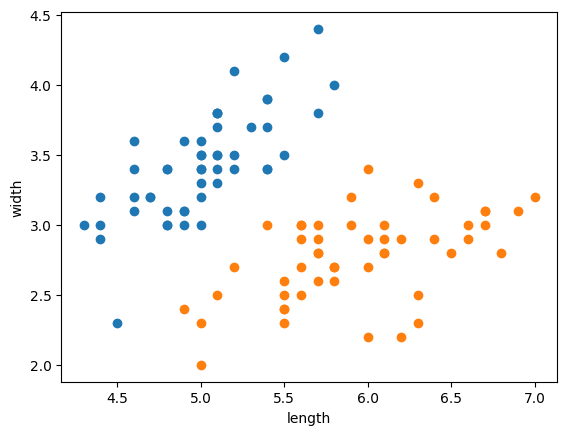

In [5]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'])
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'])
plt.xlabel('length')
plt.ylabel('width')

Text(0, 0.5, 'width')

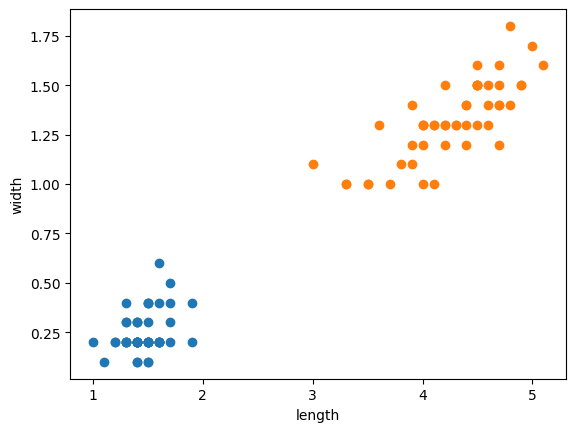

In [6]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'])
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'])
plt.xlabel('length')
plt.ylabel('width')

Text(0, 0.5, 'width')

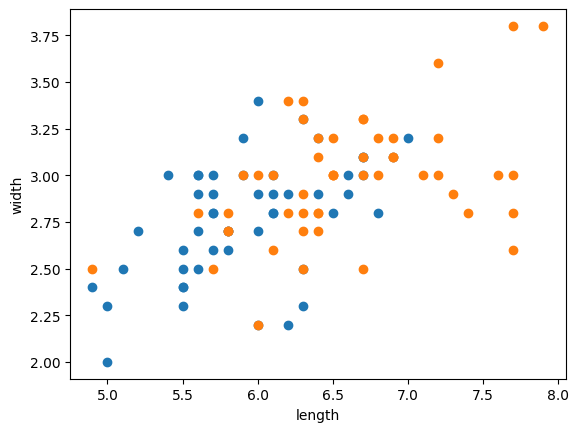

In [7]:
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'])
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'])
plt.xlabel('length')
plt.ylabel('width')

Text(0, 0.5, 'width')

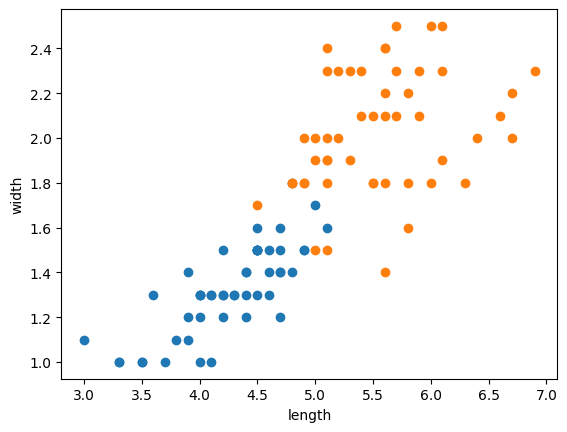

In [8]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'])
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'])
plt.xlabel('length')
plt.ylabel('width')

# *X & y for further splitting*

In [9]:
X = df.drop(columns = ['target','flower_name'])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

# *Splitting dataset for training and testing*

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
len(X_train)

120

In [14]:
len(X_test)

30

# *Model training and testing*

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
model = RandomForestClassifier(n_estimators = 10,criterion='entropy')
# n_estimators = 10 -> it is default number of trees in the forest here on 10 trees we got 100% accuracy so no need to fine tune by changing number of trees
# criterion='entropy' -> it means the impurity is clasdified based on concept called entropy default is gini though on both the criterion mmodel is achieving 100% accuracy
# for further trial - error you can change the testing data size 
# I would prefer to provide a external data for prediction to check how much accurate our model is on external data


In [17]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [18]:
y_pred = model.predict(X_test)

# *Model Accuracy*

In [19]:
model.score(X_test,y_test)

1.0

# *Confusion Matrix analysis*

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

Text(50.722222222222214, 0.5, 'Truth')

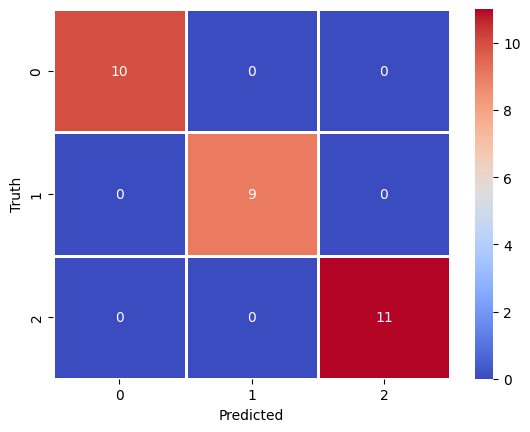

In [22]:
import seaborn as sns
sns.heatmap(cm,annot=True,cmap='coolwarm',linewidths=2)
plt.xlabel('Predicted')
plt.ylabel('Truth')